In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Customer Survey.xlsx")
df.drop(labels=df.columns[0:2].tolist(), axis=1, inplace=True)
df.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [3]:
for i in df.columns.tolist():
    for index, j in enumerate(df[i]):
        if j == "ไม่เคย":
            df[i][index] = 0
        else:
            df[i][index] = 1
df.head(5)

,Moutain bike,Collagen,Green Brownie,Mekhong,Botox,Cannabis,Hemp,Pressure gauge,LED RGB,Bikini wax,Electric massage chair,Ornamental plants,Bolster,Scales,Jaw botox,SangSom,Curry puff,Lego,Fan,Pickle drink,Nightdress,Dumbell,Robot cleaner,Wa grill,Pork stick,UAV,Food waste shredder,C2-shirt,Yipsee card,BBQ,Document grinder,Bag,Shabu,Surfskate,Board game,Dog shirt,Omakase,Cashew nuts,AI LED,Hair clippers,Dyson,Music Discs,Nose hair scissors,PS5,Blood Glucose Meter,Roti,Pickled Shrimp Paste,Dog,Thai travel,FIFA Online,Mango,Cat auto toilet,bag (Chanel),Kaki,Cordyceps,Healthy pillow for insomnia,Clean food for cat,Dido,Software,Sunscreen
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,1


In [4]:
top_10_item = df.sum(axis=0).sort_values(ascending=False)[:10]
Item_name = top_10_item.keys().tolist()

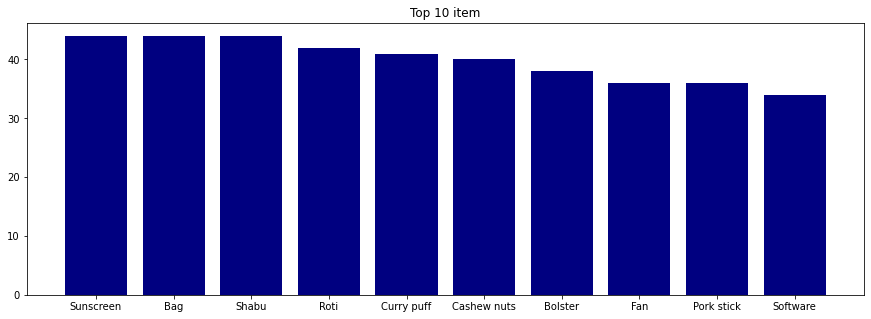

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Item_array = np.arange(len(top_10_item))

plt.figure(figsize=(15,5))
plt.bar(Item_array, top_10_item.iloc[:], color = "navy")
plt.xticks(Item_array, Item_name)
plt.title('Top 10 item')
plt.show()

In [6]:
last_10_item = df.sum(axis=0).sort_values(ascending=True)[:10]
Item_name1 = last_10_item.keys().tolist()

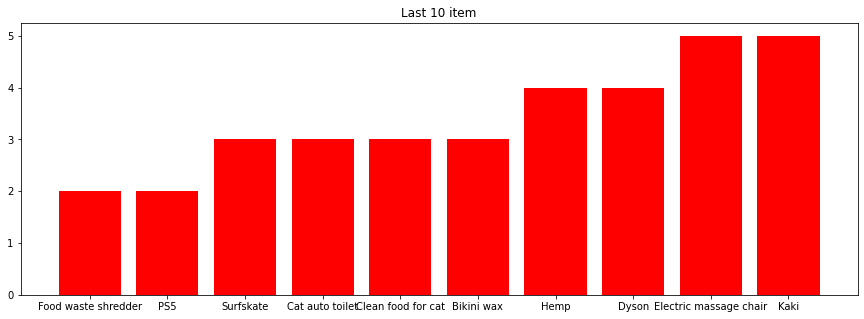

In [7]:
Item_array1 = np.arange(len(last_10_item))

plt.figure(figsize=(15,5))
plt.bar(Item_array1, last_10_item.iloc[:], color = "red")
plt.xticks(Item_array1, Item_name1)
plt.title('Last 10 item')
plt.show()

In [8]:
Item_series = df.copy().sum(axis=0).sort_values(ascending=False)
df_Item = pd.DataFrame(Item_series, columns=["Score"], dtype=int)
df_Item.reset_index(inplace=True)
df_Item["Item"] = df_Item["index"]
df_Item.drop(labels=["index"], axis=1, inplace=True)
df_Item.head(60)

,Score,Item
0,44,Sunscreen
1,44,Bag
2,44,Shabu
3,42,Roti
4,41,Curry puff
5,40,Cashew nuts
6,38,Bolster
7,36,Fan
8,36,Pork stick
9,34,Software


In [9]:
hot_encoded_df = df_Item.groupby(["Score", "Item"])['Item'].count().unstack().reset_index().fillna(0).set_index("Score")
hot_encoded_df.head(5)

Item,AI LED,BBQ,Bag,Bikini wax,Blood Glucose Meter,Board game,Bolster,Botox,C2-shirt,Cannabis,Cashew nuts,Cat auto toilet,Clean food for cat,Collagen,Cordyceps,Curry puff,Dido,Document grinder,Dog,Dog shirt,Dumbell,Dyson,Electric massage chair,FIFA Online,Fan,Food waste shredder,Green Brownie,Hair clippers,Healthy pillow for insomnia,Hemp,Jaw botox,Kaki,LED RGB,Lego,Mango,Mekhong,Moutain bike,Music Discs,Nightdress,Nose hair scissors,Omakase,Ornamental plants,PS5,Pickle drink,Pickled Shrimp Paste,Pork stick,Pressure gauge,Robot cleaner,Roti,SangSom,Scales,Shabu,Software,Sunscreen,Surfskate,Thai travel,UAV,Wa grill,Yipsee card,bag (Chanel)
Score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(AI LED),(Mekhong),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
1,(Mekhong),(AI LED),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
2,(BBQ),(Ornamental plants),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
3,(Ornamental plants),(BBQ),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
4,(Bag),(Shabu),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
5,(Shabu),(Bag),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
6,(Bag),(Sunscreen),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
7,(Sunscreen),(Bag),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
8,(Bikini wax),(Cat auto toilet),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
9,(Cat auto toilet),(Bikini wax),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf


In [13]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(AI LED),(Mekhong),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
1,(Mekhong),(AI LED),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
2,(BBQ),(Ornamental plants),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
3,(Ornamental plants),(BBQ),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
4,(Bag),(Shabu),0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
...,...,...,...,...,...,...,...,...,...
813,(FIFA Online),"(Kaki, Electric massage chair, Green Brownie, ...",0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
814,(Electric massage chair),"(Kaki, FIFA Online, Green Brownie, Jaw botox, ...",0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
815,(Green Brownie),"(Kaki, FIFA Online, Electric massage chair, Ja...",0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf
816,(Jaw botox),"(Kaki, FIFA Online, Electric massage chair, Gr...",0.034483,0.034483,0.034483,1.0,29.0,0.033294,inf


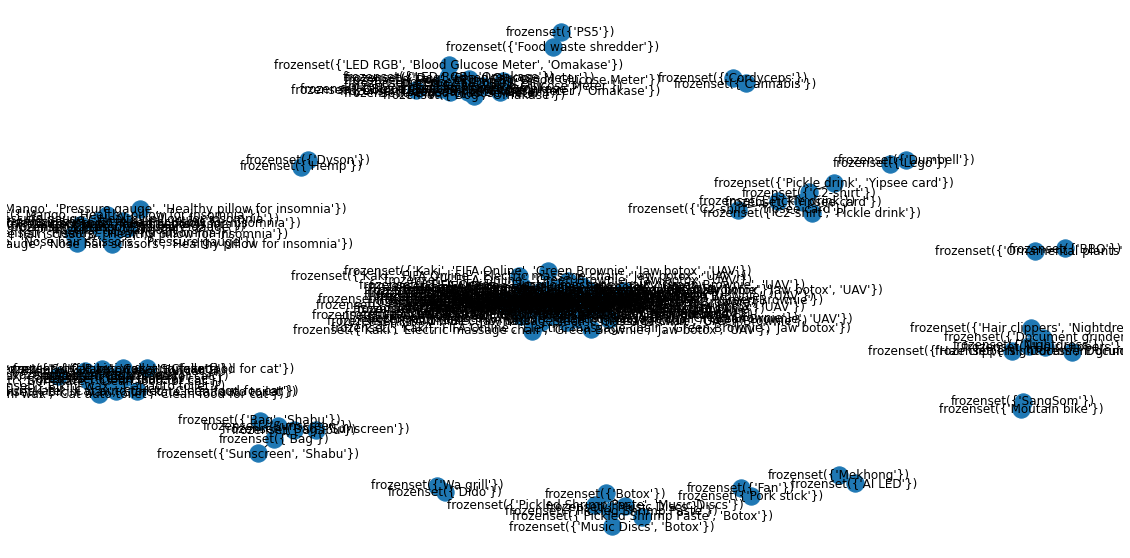

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20, 10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [15]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [16]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [17]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [18]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

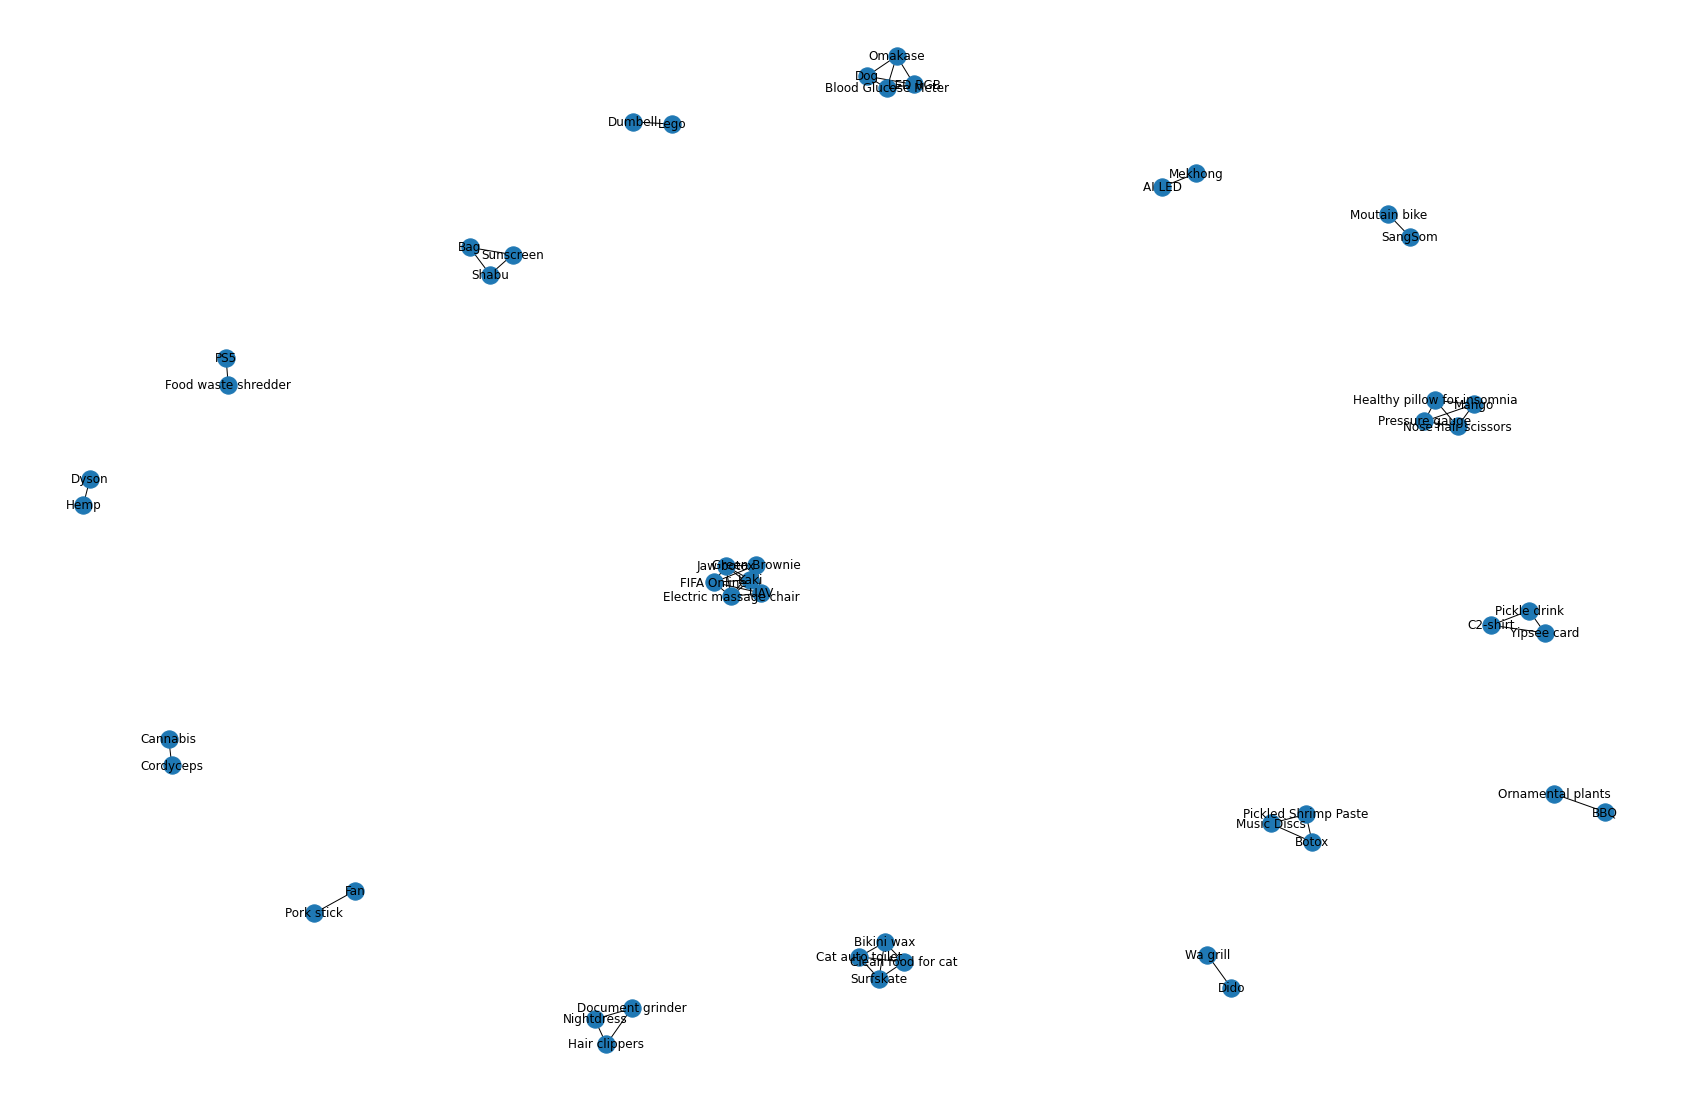

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(30,20))
GA=nx.from_pandas_edgelist(links_filtered, source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()

In [20]:
links_filtered

,item,related item,value
35,AI LED,Mekhong,1
101,BBQ,Ornamental plants,1
171,Bag,Shabu,1
173,Bag,Sunscreen,1
191,Bikini wax,Cat auto toilet,1
...,...,...,...
3390,UAV,Jaw botox,1
3391,UAV,Kaki,1
3436,Wa grill,Dido,1
3488,Yipsee card,C2-shirt,1
